In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv("/content/laptop_data.csv")
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Missing,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Missing,0,No,No,38990,47990,18,0.0,0,0


# Exploratory Data Analisis

## Deskripsi Variabel

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

Data di atas memiliki 896 baris data dan 23 kolom, dengan 7 tipe data integer, 15 object, dan 1 float.  
Selanjutnya lakukan pengecekan *missing value* pada data

## Pengecekan Missing Values

In [7]:
df.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

sekilas data diatas tidak memiliki *missing value*, namun jika kita lihat data yang ada, pada kolom "display_size" memiliki value "Missing" yang berarti *missing value* pada data. Sehingga kita akan menangani *missing value* itu pada tahap data preparation nantinya.  

Untuk sementara mari ubah *missing value* pada data menjadi NaN. Hal tersebut dilakukan untuk melakukan pengecekan jika terdapat *missing value* pada kolom lain.

In [8]:
df = df.replace("Missing",np.nan)
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,NaN,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,NaN,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,NaN,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,NaN,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,NaN,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,NaN,0,No,No,38990,47990,18,0.0,0,0


cek *missing value* pada kolom lain


In [9]:
df.isna().sum()

brand                0
model               95
processor_brand      0
processor_name       0
processor_gnrtn    239
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
display_size       332
warranty             0
Touchscreen          0
msoffice             0
latest_price         0
old_price            0
discount             0
star_rating          0
ratings              0
reviews              0
dtype: int64

ternyata terdapat *missing value* pada 3 buah kolom dengan nilai "Missing". kita memiliki 23 column, sehingga tidak apa jika kita hapus kolom yang memiliki *missing value* terbanyak. Terlepas dari jumlah kolom yang kita punya, dataset masih memiliki informasi yang cukup.  
menghapus kolom yang memiliki *missing value* terbanyak.


## Pengecekan data duplikat

In [10]:
df.duplicated().sum()

20

Ternyata data memiliki data yang berulang, sehingga perlu menghapus data duplikat tersebut.

In [11]:
df = df.drop_duplicates()
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,NaN,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,NaN,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,NaN,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,NaN,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,NaN,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,16,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,NaN,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,NaN,0,No,No,38990,47990,18,0.0,0,0


In [12]:
df = df.drop(columns=["display_size"])
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,ThinNlight,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Casual,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,ThinNlight,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,ThinNlight,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,ThinNlight,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,NaN,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,NaN,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Casual,0,No,No,38990,47990,18,0.0,0,0


## Univariate Analysis

### *Brand* apa yang paling banyak muncul pada data?

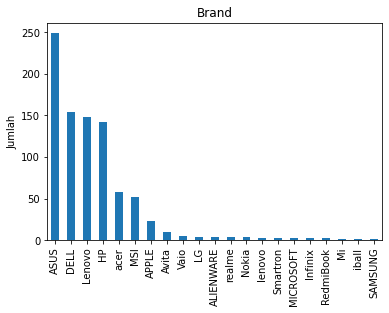

In [13]:
counts = df["brand"].value_counts()
counts.plot(kind="bar")
plt.ylabel("Jumlah")
plt.title("Brand")
plt.savefig("eda_brand", dpi=70)
plt.show()

*Brand* yang paling sering muncul pada data yaitu Asus

### Variasi ukuran ram yang digunakan pada laptop

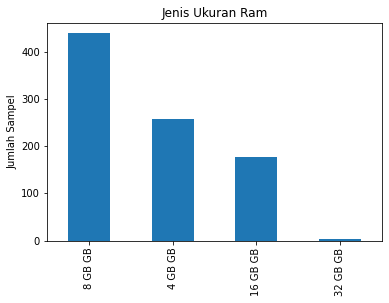

In [14]:
counts = df["ram_gb"].value_counts()
counts.plot(kind="bar")
plt.title("Jenis Ukuran Ram")
plt.ylabel("Jumlah Sampel")
plt.savefig("eda_ram", dpi=70)
plt.show()

Laptop memiliki variasi ukuran ram yang beragam, ada yang 4 GB, 8 GB, 16GB, dan 32 GB. Namun, kebanyakan laptop menggunakan ukuran ram sebesar 8 GB.

### Merek *processor* apa saja yang digunakan pada laptop?

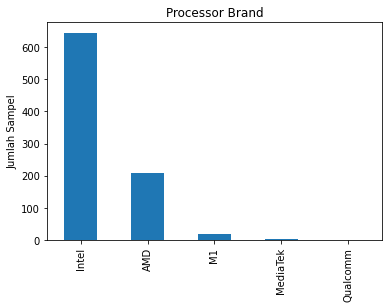

In [15]:
counts = df["processor_brand"].value_counts()
counts.plot(kind="bar")
plt.title("Processor Brand")
plt.ylabel("Jumlah Sampel")
plt.savefig("eda_processor_brand", dpi=70)
plt.show()

Kebanyakan laptop menggunakan *brand* Intel, dan AMD. Sedangkan sisanya menggunakan M1, Meidatek, Qualcomm

### Generasi processor yang digunakan pada laptop

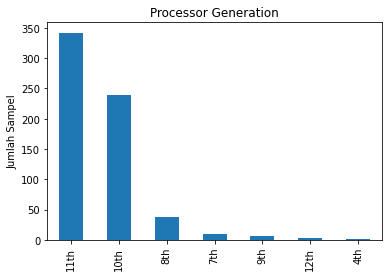

In [16]:
counts = df["processor_gnrtn"].value_counts()
counts.plot(kind="bar") 
plt.title("Processor Generation")
plt.ylabel("Jumlah Sampel")
plt.savefig("eda_processor_gnrtn", dpi=70)
plt.show()

Lebih dari 50% laptop yang ada menggunakan processor generasi 10 dan 11, dan sisanya menggunakan generasi processor selain itu.

### Jenis ukuran memori SSD yang digunakan pada laptop

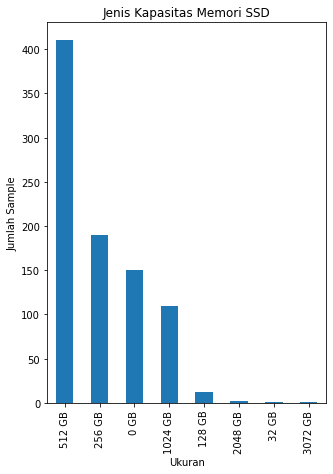

In [17]:
counts = df["ssd"].value_counts()
plt.figure(figsize=(5,7))
counts.plot(kind="bar")
plt.title("Jenis Kapasitas Memori SSD")
plt.ylabel("Jumlah Sample")
plt.xlabel("Ukuran")
plt.savefig("eda_ssd", dpi=70)
plt.show()

Ternyata laptop lebih banyak menerapkan SSD. Lebih dari 50% laptop yang ada menggunakan SSD sebagai penyimpanannya. Adapun variasi penyimpanannya sendiri beragam, mulai dari 32 GB hingga 512 GB

### Jenis ukuran memori hdd yang digunakan pada laptop

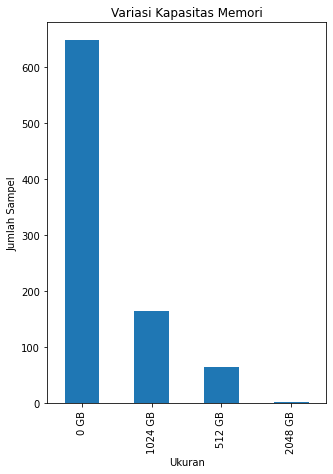

In [18]:
counts = df["hdd"].value_counts()
plt.figure(figsize=(5,7))
counts.plot(kind="bar")
plt.title("Variasi Kapasitas Memori")
plt.xlabel("Ukuran")
plt.ylabel("Jumlah Sampel")
plt.savefig("eda_hdd", dpi=70)
plt.show()

Laptop yang menggunakan hdd sebagai penyimpanannya berjumlah sedikit. Adapun ukuran yang digunakannya pun beragam. Mulai dari 512 GB hingga 2048 GB

### Laptop yang menerapkan fitur *touchscreen* didalamnya

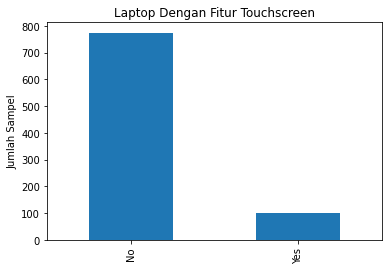

In [19]:
counts = df["Touchscreen"].value_counts()
counts.plot(kind="bar")
plt.title("Laptop Dengan Fitur Touchscreen")
plt.ylabel("Jumlah Sampel")
plt.savefig("eda_touchscreen", dpi=70)
plt.show()

Laptop yang ada hampir keseluruhan tidak menerapkan fitur *touchscreen* didalamnya

### Jenis *processor* yang digunakan pada laptop

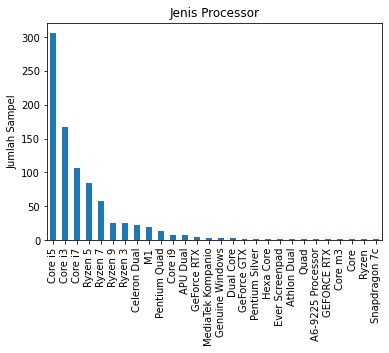

In [20]:
counts = df["processor_name"].value_counts()
counts.plot(kind="bar")
plt.title("Jenis Processor")
plt.ylabel("Jumlah Sampel")
plt.savefig("eda_processor_name", dpi=70)
plt.show()

Kebanyakan laptop yang ada menggunakan jenis processor intel core i5, diikuti dengan core i3, core i7, ryzen 5, dan ryzen 9.

### Laptop yang telah terinstall MsOffice didalamnya

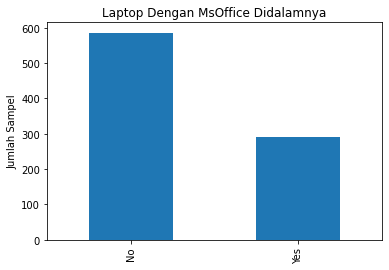

In [21]:
counts = df["msoffice"].value_counts()
counts.plot(kind="bar")
plt.title("Laptop Dengan MsOffice Didalamnya")
plt.ylabel("Jumlah Sampel")
plt.savefig("eda_msoffice", dpi=70)
plt.show()

Kebanyakan laptop tidak terinstall msoffice didalamnya.

### Tipe ram yang digunakan pada laptop

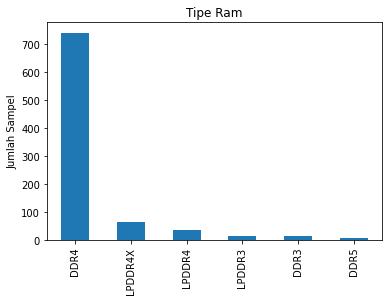

In [22]:
counts = df["ram_type"].value_counts()
counts.plot(kind="bar")
plt.title("Tipe Ram")
plt.ylabel("Jumlah Sampel")
plt.savefig("eda_ram_type", dpi=70)
plt.show()

lebih dari 70% laptop yang ada, menggunakan DDR4 sebagai tipe ramnya.

In [23]:
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'warranty', 'Touchscreen', 'msoffice',
       'latest_price', 'old_price', 'discount', 'star_rating', 'ratings',
       'reviews'],
      dtype='object')

### Variasi ukuran *graphic card* dalam satuan GB pada laptop

Text(24.125, 0.5, 'Jumlah Sampel')

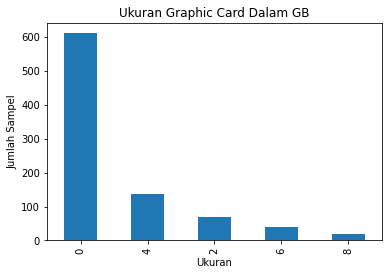

In [24]:
counts = df["graphic_card_gb"].value_counts()
counts.plot(kind="bar") 
plt.xlabel("Ukuran")
plt.title("Ukuran Graphic Card Dalam GB")
plt.savefig("eda_graphic_card", dpi=70)
plt.ylabel("Jumlah Sampel")

Laptop yang menggunakan *graphic card* dengan ukuran di atas 2GB berjumlah sedikit

# Data Preparation


## Menangani *missing value* dengan teknik arbitrary imputation

menggunakan teknik imputasi arbitrary(suka-suka), dengan tujuan menjadikan nilai imputasi tersebut menjadi nilai tersendiri

In [25]:
df.isna().sum()

brand                0
model               95
processor_brand      0
processor_name       0
processor_gnrtn    238
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
latest_price         0
old_price            0
discount             0
star_rating          0
ratings              0
reviews              0
dtype: int64

Mengganti *missing value* dengan nilai tersendiri yang direpresentasikan oleh "x"

In [26]:
df = df.fillna("x")
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,ThinNlight,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Casual,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,ThinNlight,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,ThinNlight,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,ThinNlight,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,x,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,x,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,x,4 GB GB,DDR4,1024 GB,0 GB,Windows,...,Casual,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,x,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,...,Casual,0,No,No,38990,47990,18,0.0,0,0


In [27]:
df.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

## menghilangkan karakter string pada data sekaligus mengubahnya menjadi tipe data number

In [28]:

df["ram_gb"] = df["ram_gb"].str.replace("GB GB","")
df["ram_gb"] = pd.to_numeric(df["ram_gb"])

df["ssd"] = df["ssd"].str.replace("GB","")
df["ssd"] = pd.to_numeric(df["ssd"])

df["hdd"] = df["hdd"].str.replace("GB","")
df["hdd"] = pd.to_numeric(df["hdd"])
df



,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4,DDR4,0,1024,Windows,...,ThinNlight,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4,DDR4,0,512,Windows,...,Casual,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,...,ThinNlight,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,...,ThinNlight,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4,DDR4,256,0,Windows,...,ThinNlight,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,x,4,DDR4,1024,0,Windows,...,Casual,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,x,4,DDR4,1024,0,Windows,...,Casual,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,x,4,DDR4,1024,0,Windows,...,Casual,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,x,4,LPDDR4X,0,512,Windows,...,Casual,0,No,No,38990,47990,18,0.0,0,0


In [29]:
df["os_bit"] = df["os_bit"].str.replace("-bit","")
df["os_bit"] = pd.to_numeric(df["os_bit"])

## Menangani data ordinal atau data yang berurutan dengan label encoder


data ordinal atau data yang berurutan mencakup kolom processor_gnrtn, dan ram_type

In [30]:
le = LabelEncoder()
df["processor_gnrtn"] = le.fit_transform(df["processor_gnrtn"])
df["ram_type"] = le.fit_transform(df["ram_type"])
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,0,4,1,0,1024,Windows,...,ThinNlight,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,0,4,1,0,512,Windows,...,Casual,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,0,4,1,256,0,Windows,...,ThinNlight,0,No,No,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,No,No,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,No,No,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,No,No,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,7,4,5,0,512,Windows,...,Casual,0,No,No,38990,47990,18,0.0,0,0


## Menangani *binary data* dengan mengubah "yes" | "64"-bit menjadi 1, dan "no" | "32"-bit jadi 0.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 895
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            876 non-null    object 
 1   model            876 non-null    object 
 2   processor_brand  876 non-null    object 
 3   processor_name   876 non-null    object 
 4   processor_gnrtn  876 non-null    int64  
 5   ram_gb           876 non-null    int64  
 6   ram_type         876 non-null    int64  
 7   ssd              876 non-null    int64  
 8   hdd              876 non-null    int64  
 9   os               876 non-null    object 
 10  os_bit           876 non-null    int64  
 11  graphic_card_gb  876 non-null    int64  
 12  weight           876 non-null    object 
 13  warranty         876 non-null    int64  
 14  Touchscreen      876 non-null    object 
 15  msoffice         876 non-null    object 
 16  latest_price     876 non-null    int64  
 17  old_price       

In [32]:
df["Touchscreen"] = df["Touchscreen"].apply(lambda x: 1 if x == "Yes" else(0 if x == "No" else None))
df["msoffice"] = df["msoffice"].apply(lambda x: 1 if x == "Yes" else(0 if x == "No" else None))
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,0,4,1,0,1024,Windows,...,ThinNlight,0,0,0,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,0,4,1,0,512,Windows,...,Casual,0,0,0,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,0,0,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,0,0,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,0,4,1,256,0,Windows,...,ThinNlight,0,0,0,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,7,4,5,0,512,Windows,...,Casual,0,0,0,38990,47990,18,0.0,0,0


In [33]:
df["os_bit"] = df["os_bit"].apply(lambda x: 1 if x == 64 else (0 if x == 32 else None))
df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,0,4,1,0,1024,Windows,...,ThinNlight,0,0,0,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,0,4,1,0,512,Windows,...,Casual,0,0,0,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,0,0,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,ThinNlight,0,0,0,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,0,4,1,256,0,Windows,...,ThinNlight,0,0,0,24990,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,144990,194990,25,0.0,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,149990,0,0,0.0,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,Casual,1,0,0,142990,0,0,0.0,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,7,4,5,0,512,Windows,...,Casual,0,0,0,38990,47990,18,0.0,0,0


## Menangani data nominal atau data yang tidak berurutan dengan one hot encoding


nominal data terletak pada kolom, brand, model, processor_brand, processor_name, os, weight, 


In [34]:
category = pd.get_dummies(df[["brand","model","processor_brand","processor_name","os","weight"]])
category

,brand_ALIENWARE,brand_APPLE,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Infinix,brand_LG,brand_Lenovo,brand_MICROSOFT,...,processor_name_Ryzen 5,processor_name_Ryzen 7,processor_name_Ryzen 9,processor_name_Snapdragon 7c,os_DOS,os_Mac,os_Windows,weight_Casual,weight_Gaming,weight_ThinNlight
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
892,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
893,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [35]:
saved_df = df.copy()

Melakukan konkatenasi dataframe asli dengan data yang telah dilakukan one hot encoder

In [36]:
new_df = pd.concat([df, category],axis=1)
new_df

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,processor_name_Ryzen 5,processor_name_Ryzen 7,processor_name_Ryzen 9,processor_name_Snapdragon 7c,os_DOS,os_Mac,os_Windows,weight_Casual,weight_Gaming,weight_ThinNlight
0,Lenovo,A6-9225,AMD,A6-9225 Processor,0,4,1,0,1024,Windows,...,0,0,0,0,0,0,1,0,0,1
1,Lenovo,Ideapad,AMD,APU Dual,0,4,1,0,512,Windows,...,0,0,0,0,0,0,1,1,0,0
2,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,0,0,0,0,0,0,1,0,0,1
3,Avita,PURA,AMD,APU Dual,0,4,1,128,0,Windows,...,0,0,0,0,0,0,1,0,0,1
4,Avita,PURA,AMD,APU Dual,0,4,1,256,0,Windows,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,0,0,1,0,0,0,1,1,0,0
892,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,0,0,1,0,0,0,1,1,0,0
893,ASUS,Ryzen,AMD,Ryzen 9,7,4,1,1024,0,Windows,...,0,0,1,0,0,0,1,1,0,0
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,7,4,5,0,512,Windows,...,0,0,0,1,0,0,1,1,0,0


Menghapus kolom yang telah dilakukan one hot encoder

In [37]:
new_df = new_df.drop(columns=["brand","model","processor_brand","processor_name","os","weight"])
new_df

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,...,processor_name_Ryzen 5,processor_name_Ryzen 7,processor_name_Ryzen 9,processor_name_Snapdragon 7c,os_DOS,os_Mac,os_Windows,weight_Casual,weight_Gaming,weight_ThinNlight
0,0,4,1,0,1024,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,4,1,0,512,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,4,1,128,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,4,1,128,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,4,1,256,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,7,4,1,1024,0,1,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
892,7,4,1,1024,0,1,4,1,0,0,...,0,0,1,0,0,0,1,1,0,0
893,7,4,1,1024,0,1,4,1,0,0,...,0,0,1,0,0,0,1,1,0,0
894,7,4,5,0,512,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


### Membagi data latih dan data uji dengan rasio 80-20


In [38]:
fitur = new_df.drop(columns=["latest_price"])
label = new_df["latest_price"]

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(fitur, label, test_size=.2, random_state=42)


# *Modeling* menggunakan beberapa algoritma

## Metrik evaluasi yang digunakan yaitu MAE. Goals yang akan dicapai yaitu mencari algoritma dengan output MAE sekecil mungkin

## Random Forest

In [40]:
rf = RandomForestRegressor(n_estimators=80, max_depth=16, random_state=99)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=16, n_estimators=80, random_state=99)

Skor *metric* MAE menggunakan algoritma Random Forest terhadap data latih

In [41]:
mae = mean_absolute_error(Y_train, rf.predict(X_train))
mae

1517.8860657607863

Distribusi hasil prediksi dengan label asli

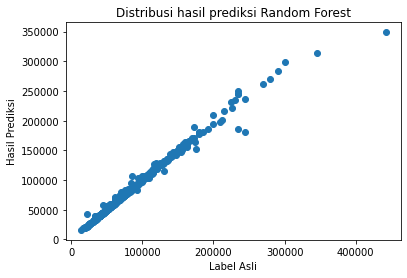

In [42]:
plt.scatter(Y_train, rf.predict(X_train))
plt.xlabel("Label Asli")
plt.ylabel("Hasil Prediksi")
plt.title("Distribusi hasil prediksi Random Forest")
plt.savefig("distribusi_rf", dpi=70)
plt.show()

Observasi hasil prediksi dengan label asli

In [43]:
prediksi = rf.predict(X_test)
hasil = {"Label" : Y_test, "hasil_prediksi" : prediksi}
pd.DataFrame(hasil)

,Label,hasil_prediksi
371,113590,109237.500000
674,169990,158598.175000
848,92990,92850.850000
712,44490,43975.709673
217,106167,104832.362500
...,...,...
415,82990,84185.087500
295,63990,64019.017586
477,46790,48115.239583
84,41990,41334.547768


## *Boosting Algorithm* dengan metode *Adaptive Boosting*

In [44]:
boosting = AdaBoostRegressor(n_estimators = 50, learning_rate= 0.005)
boosting.fit(X_train, Y_train)

AdaBoostRegressor(learning_rate=0.005)

*Score metric* MAE terhadap data latih

In [45]:
boosting_mae = mean_absolute_error(Y_train, boosting.predict(X_train))
boosting_mae

13117.275588009988

Distribusi hasil prediksi dengan label asli

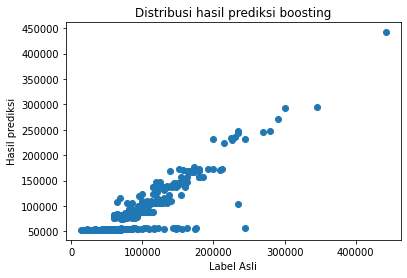

In [46]:
plt.scatter(Y_train, boosting.predict(X_train))
plt.xlabel("Label Asli")
plt.ylabel("Hasil prediksi")
plt.title("Distribusi hasil prediksi boosting")
plt.savefig("distribusi_boosting", dpi=70)
plt.show()

## *Linear Regression*

In [47]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

*Score metric* MAE terhadap data latih

In [48]:
linreg_mae = mean_absolute_error(Y_train, linreg.predict(X_train))
linreg_mae

8870.703284187468

Distribusi hasil prediksi dengan label asli

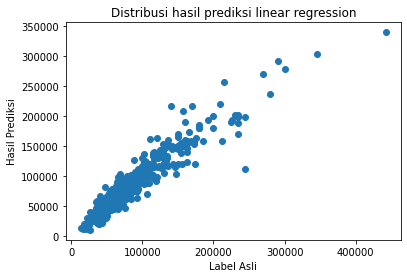

In [49]:
plt.scatter(Y_train, linreg.predict(X_train))
plt.xlabel("Label Asli")
plt.ylabel("Hasil Prediksi")
plt.title("Distribusi hasil prediksi linear regression")
plt.savefig("distribusi_linreg", dpi=70)
plt.show()

Data Frame untuk representasi *score* MAE pada data latih dan data uji

In [50]:
model_dict = {"rf" : rf, "boosting" : boosting, "lr" : linreg}
model_mae = pd.DataFrame(index=["rf","boosting","lr"], columns=["train_mae","test_mae"])
for x,y in model_dict.items():
  model_mae.loc[x,"train_mae"] = mean_absolute_error(Y_train, y.predict(X_train))
  model_mae.loc[x,"test_mae"] = mean_absolute_error(Y_test, y.predict(X_test))

model_mae

,train_mae,test_mae
rf,1517.886066,3272.169815
boosting,13117.275588,13238.748562
lr,8870.703284,12176.54745


grafik hasil skor MAE terhadap data latih dan data uji pada masing-masing algoritma

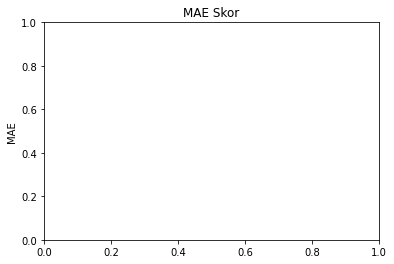

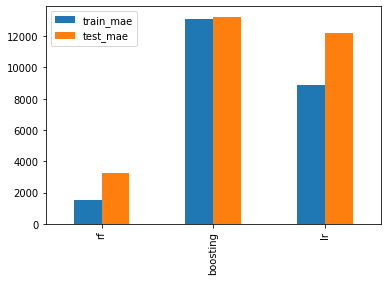

In [51]:

plt.ylabel("MAE")
plt.title("MAE Skor")
plt.savefig("hasil_algoritma_mae")
model_mae.plot(kind="bar")
plt.show()

Terlihat bahwa algoritma random forest memiliki skor mae yang paling kecil, baik pada data latih maupun data uji. Sehingga model inilah yang optimal untuk dataset prediksi harga laptop


##Improve model dengan hyperparameter tuning menggunakan GridSearchCV

In [52]:
grid_params = {"n_estimators" : [50,60,70,80,90,100], "max_depth" : [4,8,16,32,64], "random_state" : [99]}
grid = GridSearchCV(RandomForestRegressor(), grid_params, cv=5, verbose=2, scoring="neg_mean_absolute_error")
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ......max_depth=4, n_estimators=50, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=50, random_state=99; total time=   0.1s
[CV] END ......max_depth=4, n_estimators=50, random_state=99; total time=   0.1s
[CV] END ......max_depth=4, n_estimators=60, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=60, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=60, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=60, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=60, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=70, random_state=99; total time=   0.2s
[CV] END ......max_depth=4, n_estimators=70, ra

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 8, 16, 32, 64],
                         'n_estimators': [50, 60, 70, 80, 90, 100],
                         'random_state': [99]},
             scoring='neg_mean_absolute_error', verbose=2)

In [53]:
print(grid.best_params_)

{'max_depth': 16, 'n_estimators': 100, 'random_state': 99}


## Melatih ulang model menggunakan parameter terbaik

In [54]:
model = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=99)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=16, random_state=99)

In [55]:
model_mae.loc["rf","train_mae"] = mean_absolute_error(Y_train, model.predict(X_train))
model_mae.loc["rf","test_mae"] = mean_absolute_error(Y_test, model.predict(X_test))
model_mae

,train_mae,test_mae
rf,1529.491709,3259.064505
boosting,13117.275588,13238.748562
lr,8870.703284,12176.54745


In [56]:
prediksi = {"Y_true" : Y_test[:2]}
coba = X_test.iloc[:2].copy()

prediksi["random_forest"] = model.predict(coba).round(1)
pd.DataFrame(prediksi)

,Y_true,random_forest
371,113590,108780.0
674,169990,158299.8
